# k-Means (k-Medias)

_Autor:_ Luis Eduardo Cerna

_Editado por:_ Edwin Bedolla

Como su nombre ya lo indica, _k-Means_ logra relacionar la información dentro de un conjunto de datos utilizando únicamente la media aritmética de cada $k$ grupo para clasificar los datos. El grupo con la media más _cercana_ al dato en cuestíon, será el grupo al que pertenezca. _k-Means_ es entonces un método de **_clasificación no supervisada_**.

## Estructura general del algoritmo

1. **Escoger** de manera aleatoria $k$ valores del conjunto $n$ de datos como una primer aproximación. Éstos serán los **centroides iniciales** de las clases.
2. **Calcular la distancia** entre cada centroide y el resto de los puntos del conjunto de datos.
3. **Clasificar** cada uno de los puntos dentro del grupo perteneciente al centroide más cercano, utilizando la _distancia_ más corta como parámetro de decisión.

En este punto se tiene separado el conjunto $n$ de puntos en $k$ grupos. Sin embargo como la elección del centroide de las clases fue hecho de manera aleatoria, no se puede asegurar aún que la clasificación es correcta. Harán falta más iteraciones con el fin de afinar la media de cada grupo para clasificar correctamente todos los puntos.

### Ciclo
4. **Calcular los nuevos centroides**.
* ¿Se movieron de lugar los centroides?
 * **Sí**, Volver al paso 2.
 * **No**, Salir del ciclo.
* **Fin**

El criterio del paso 5 usualmente viene dado dentro de un margen de error.

La siguiente animación tomada de [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering#/media/File:K-means_convergence.gif) puede ayudar para una mejor visualización del comportamiento iterativo del algoritmo:

![kmeans](static/K-means_convergence.gif)

### _K-means_ en python

El siguiente es un ejemplo ilustrativo tomado de _Python Data Science Handbook_ por Jake VanderPlas. El extracto original se puede encontrar [aquí](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html).

Además se muestra una implementación hecha por completo en Python para mostrar cómo funciona el algoritmo y cómo se programa para cualquier conjunto de datos.

In [10]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (21, 12)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import sqeuclidean

sns.set()

Se generan grupos de datos (4 grupos) utilizando un método de [scikit learn](https://scikit-learn.org/stable/index.html) llamado [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), el cual sirve para generar  puntos distribuídos de manera normal. Sólo debes de indicar el número de puntos que se desean obtener, el número de centroides (medias), la desviación estandar, entre otros. Es importante leer la [documentación completa](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) si se desea conocer más sobre los argumentos que recibe.

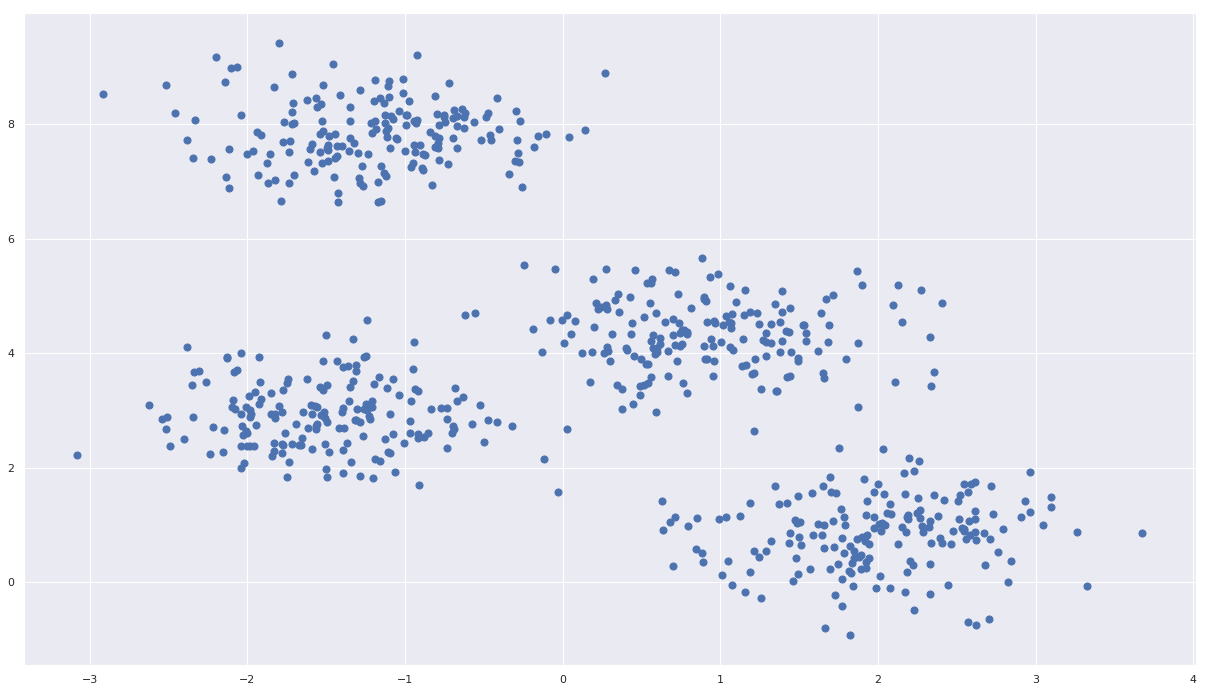

In [11]:
n_muestras = 700
n_centros = 4
desv_stdr = 0.60

X, y_true = make_blobs(n_samples=n_muestras, centers=n_centros,
                       cluster_std=desv_stdr, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

La primera aproximación a este método es crear una implementación. En general, el algoritmo se emplea así:

- Escoger tantos centros como se desee, de forma aleatoria.
- Iterar sobre todo el conjunto de puntos y calcular la distancia a cada centro.
- Aquellos puntos más cercanos a un centro son los que se clasifican como parte de esa clase
- Con ese nuevo conjunto de puntos se calcula el promedio y ese es el nuevo centro de cada clase.

La implementación que se muestra aquí tiene esta estructura.

In [77]:
# Implementación hecha por Edwin Bedolla

class kMeans:
    def __init__(self, k_comps=3, max_iter=100):
        self.clusters = {}
        self.centroides = None
        self.num_clases = k_comps
        self.iteraciones = max_iter

    def inicializar(self, datos):
        dim_datos = datos.shape[1]
        # Crear los arreglos vacíos por clase
        k_centroide = np.zeros((self.num_clases, dim_datos))
        for k in range(self.num_clases):
            # Inicializar aleatoriamente los centroides
            for d in range(dim_datos):
                centro = np.random.uniform(np.min(datos[:, d]), np.max(datos[:, d]))
                k_centroide[k, d] = centro
        # Guardar los centros
        self.centroides = k_centroide

    def clasificar(self, datos):
        # Crear centros iniciales
        self.inicializar(datos)

        distancia = np.zeros(self.num_clases)
        
        for _ in range(self.iteraciones):
            # Reinicializar el diccionario de clases
            for k in range(self.num_clases):
                self.clusters[k] = []

            # Calcular distancias
            for fila in datos:
                for k in range(self.num_clases):
                    distancia[k] = sqeuclidean(fila, self.centroides[k, :])
                idx_dminima = np.argmin(distancia)
                self.clusters[idx_dminima].append(fila)

            # Calcular los nuevos centros
            for k, v in self.clusters.items():
                self.clusters[k] = np.array(v)
                self.centroides[k] = np.mean(v, axis=0)

        # Crear arreglo de etiquetas
        y_etiquetas = np.zeros(datos.shape[0])
        for k, v in self.clusters.items():
            for dato in v:
                idx_dim, _ = np.where(datos == dato)
                indice = idx_dim[1]
                y_etiquetas[indice] = k

        return y_etiquetas


In [78]:
# Instanciar y clasificar
kmeans = kMeans(k_comps=n_centros, max_iter=300)
resultado = kmeans.clasificar(X)

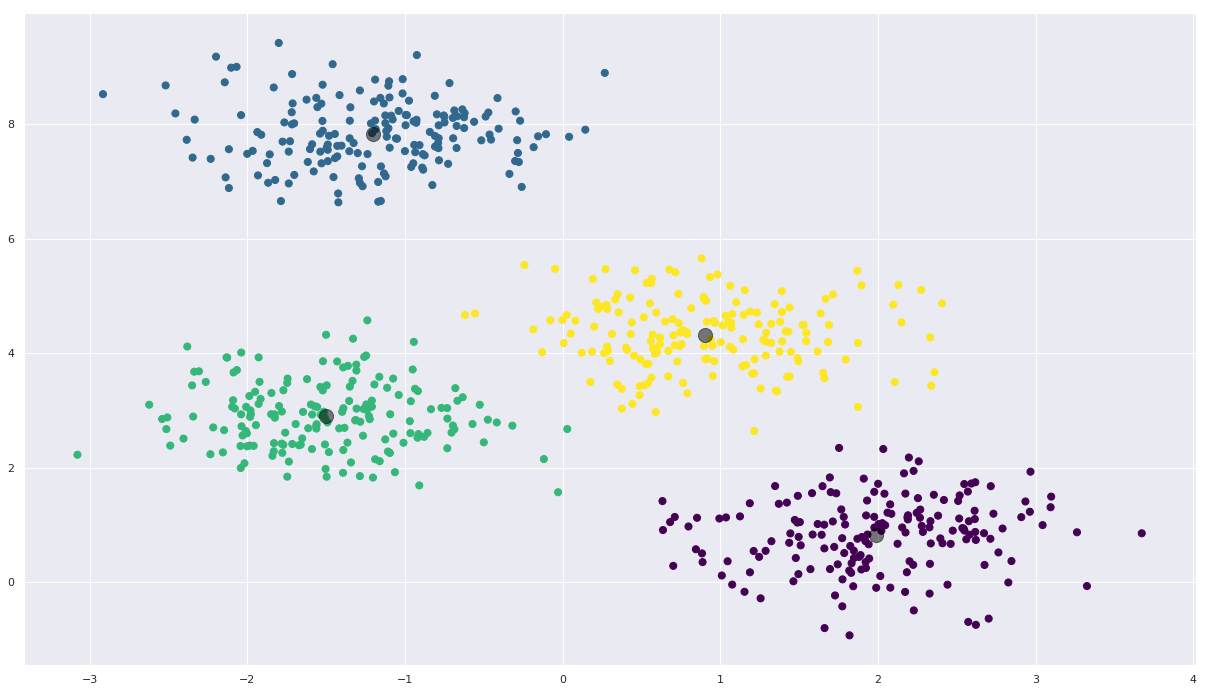

In [79]:
plt.scatter(X[:, 0], X[:, 1], c=resultado, s=50, cmap="viridis")

centros = kmeans.centroides
plt.scatter(centros[:, 0], centros[:, 1], c="black", s=200, alpha=0.5)

Ahora se importará el módulo de `scikit-learn` para realizar la clasificación, llamado [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) y comparar con la implementación, en general deben de dar el _mismo resultado_ pero quizás con los colores cambiados; normalmente la implementación de `scikit-learn` es mucho más rápida y eficiente.

Éste precisa de indicar el número de clases que se desea obtener. Sin embargo, nuevamente, se sugiere leer la [documentación completa](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para mayor información.

In [90]:
# Se crea un objeto con la información del número de clases
# que se desean obtener
kmedias = KMeans(n_clusters=n_centros)
# se computan los centroides utilizandi 
# KMeans sobre el conjunto de datos X
y_kmedias = kmedias.fit_predict(X)

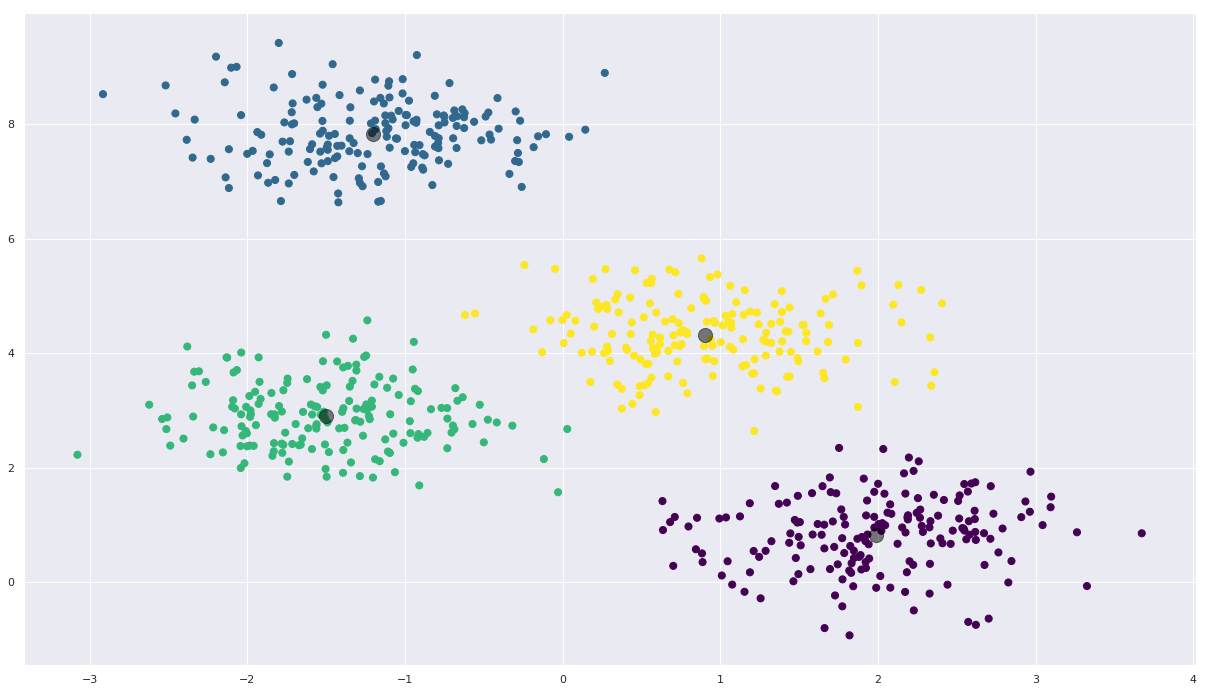

In [91]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmedias, s=50, cmap="viridis")

centros = kmedias.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c="black", s=200, alpha=0.5)

*k-Means* requiere calcular las ditancias de todos los puntos a los centroides de las clases itertatibamente hasta cumplir con alguna condición de paro, de manera que se deben calcular todas las combinaciones posibles. Ésto convierte a *k-Means* en un método muy robusto de clasificación no supervisada.

El problema puede presentarse cuando se trabaja con una gran cantidad de información, ya que el número de combinaciones crecerá exponencialmente con el numero de datos, y así el tiempo de cómputo.